In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.svm import LinearSVR


Importacion del Dataset

In [2]:
bogota = pd.read_csv("/content/inmuebles_bogota.csv")
bogota

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3.0,2.0,70.0,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4.0,3.0,170.0,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3.0,3.0,144.0,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3.0,2.0,154.0,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2.0,3.0,128.0,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000
...,...,...,...,...,...,...,...,...
9515,Apartamento,Apartamento en venta en Kennedy,3.0,2.0,70.0,Kennedy,Kennedy Central,$ 290.000.000
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2.0,2.0,100.0,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,$ 670.000.000
9517,Local,Local en venta en Restrepo,8.0,6.0,383.0,Restrepo,Restrepo,$ 900.000.000
9518,Casa,Casa en venta en Engativa,3.0,2.0,183.0,Engativa,Engativá,$ 335.000.000


# Nueva sección

In [3]:
bogota.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tipo          9520 non-null   object 
 1   Descripcion   9519 non-null   object 
 2   Habitaciones  9519 non-null   float64
 3   Baños         9519 non-null   float64
 4   Área          9519 non-null   float64
 5   Barrio        9519 non-null   object 
 6   UPZ           9477 non-null   object 
 7   Valor         9519 non-null   object 
dtypes: float64(3), object(5)
memory usage: 595.1+ KB


In [4]:
prueba = bogota["Tipo"]
prueba.unique()

array(['Apartamento', 'Casa', 'Oficina/Consultorio', 'Local',
       'Apartamento,"Apartamento 54,11M",1,2,54,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 335.238.800',
       'Bodega', 'Lote', 'Edificio', 'Finca'], dtype=object)

In [5]:
bogota2 = bogota["Valor"].str.split(" ", expand=True)[[1]]
bogota2

,1
0,360.000.000
1,670.000.000
2,1.120.000.000
3,890.000.000
4,970.000.000
...,...
9515,290.000.000
9516,670.000.000
9517,900.000.000
9518,335.000.000


In [6]:
bogota['Valor']=bogota2

In [7]:
bogota["Promedio de area de cada ambiente"] = (bogota["Habitaciones"]+bogota["Baños"])/bogota["Área"]
bogota

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor,Promedio de area de cada ambiente
0,Apartamento,Apartamento en venta en Zona Noroccidental,3.0,2.0,70.0,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,360.000.000,0.071429
1,Casa,Casa en venta en Castilla,4.0,3.0,170.0,Castilla,KENNEDY: Castilla + Bavaria,670.000.000,0.041176
2,Apartamento,Apartamento en venta en Chico Reservado,3.0,3.0,144.0,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,1.120.000.000,0.041667
3,Apartamento,Apartamento en venta en Usaquén,3.0,2.0,154.0,Usaquén,Usaquén,890.000.000,0.032468
4,Apartamento,Apartamento en venta en Bella Suiza,2.0,3.0,128.0,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,970.000.000,0.039062
...,...,...,...,...,...,...,...,...,...
9515,Apartamento,Apartamento en venta en Kennedy,3.0,2.0,70.0,Kennedy,Kennedy Central,290.000.000,0.071429
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2.0,2.0,100.0,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,670.000.000,0.040000
9517,Local,Local en venta en Restrepo,8.0,6.0,383.0,Restrepo,Restrepo,900.000.000,0.036554
9518,Casa,Casa en venta en Engativa,3.0,2.0,183.0,Engativa,Engativá,335.000.000,0.027322


In [8]:
bogota["Promedio de precio de cada ambiente"] = (bogota["Habitaciones"]+bogota["Baños"])/bogota["Valor"]
bogota

TypeError: ignored

In [9]:
bogota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Tipo                               9520 non-null   object 
 1   Descripcion                        9519 non-null   object 
 2   Habitaciones                       9519 non-null   float64
 3   Baños                              9519 non-null   float64
 4   Área                               9519 non-null   float64
 5   Barrio                             9519 non-null   object 
 6   UPZ                                9477 non-null   object 
 7   Valor                              9519 non-null   object 
 8   Promedio de area de cada ambiente  9519 non-null   float64
dtypes: float64(4), object(5)
memory usage: 669.5+ KB


In [10]:
bogota["Valor"].replace(".","",regex=True)

0        
1        
2        
3        
4        
       ..
9515     
9516     
9517     
9518     
9519     
Name: Valor, Length: 9520, dtype: object

In [11]:
bogota["Valor"].astype(float64)

NameError: ignored

In [12]:
bogota["Metro Cuadrado"] = bogota["Valor"]/bogota["Área"]

TypeError: ignored

In [13]:
bogota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Tipo                               9520 non-null   object 
 1   Descripcion                        9519 non-null   object 
 2   Habitaciones                       9519 non-null   float64
 3   Baños                              9519 non-null   float64
 4   Área                               9519 non-null   float64
 5   Barrio                             9519 non-null   object 
 6   UPZ                                9477 non-null   object 
 7   Valor                              9519 non-null   object 
 8   Promedio de area de cada ambiente  9519 non-null   float64
dtypes: float64(4), object(5)
memory usage: 669.5+ KB


In [14]:
bogota["Valor"] = bogota["Valor"].replace('.','')

In [15]:
bogota["Valor"] = bogota["Valor"].str.replace('.','')
bogota["Valor"]

<ipython-input-15-a8dbc1fa50f9>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bogota["Valor"] = bogota["Valor"].str.replace('.','')


0        360000000
1        670000000
2       1120000000
3        890000000
4        970000000
           ...    
9515     290000000
9516     670000000
9517     900000000
9518     335000000
9519     144990000
Name: Valor, Length: 9520, dtype: object

In [16]:
bogota["Valor"].astype(np.float64)

0       3.600000e+08
1       6.700000e+08
2       1.120000e+09
3       8.900000e+08
4       9.700000e+08
            ...     
9515    2.900000e+08
9516    6.700000e+08
9517    9.000000e+08
9518    3.350000e+08
9519    1.449900e+08
Name: Valor, Length: 9520, dtype: float64

In [17]:
bogota["Área"]

0        70.0
1       170.0
2       144.0
3       154.0
4       128.0
        ...  
9515     70.0
9516    100.0
9517    383.0
9518    183.0
9519     52.0
Name: Área, Length: 9520, dtype: float64

In [18]:
bogota["Valor"].dropna()

0        360000000
1        670000000
2       1120000000
3        890000000
4        970000000
           ...    
9515     290000000
9516     670000000
9517     900000000
9518     335000000
9519     144990000
Name: Valor, Length: 9519, dtype: object

In [19]:
bogota["Valor"] = bogota["Valor"].astype("float64")

In [20]:
bogota["Valor por ambiente"] = bogota["Valor"]/bogota["Habitaciones"]+bogota["Baños"]

In [21]:
bogota["metro cuadrado"] = bogota["Área"]/bogota["Valor"]
bogota

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor,Promedio de area de cada ambiente,Valor por ambiente,metro cuadrado
0,Apartamento,Apartamento en venta en Zona Noroccidental,3.0,2.0,70.0,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,3.600000e+08,0.071429,1.200000e+08,1.944444e-07
1,Casa,Casa en venta en Castilla,4.0,3.0,170.0,Castilla,KENNEDY: Castilla + Bavaria,6.700000e+08,0.041176,1.675000e+08,2.537313e-07
2,Apartamento,Apartamento en venta en Chico Reservado,3.0,3.0,144.0,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,1.120000e+09,0.041667,3.733333e+08,1.285714e-07
3,Apartamento,Apartamento en venta en Usaquén,3.0,2.0,154.0,Usaquén,Usaquén,8.900000e+08,0.032468,2.966667e+08,1.730337e-07
4,Apartamento,Apartamento en venta en Bella Suiza,2.0,3.0,128.0,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,9.700000e+08,0.039062,4.850000e+08,1.319588e-07
...,...,...,...,...,...,...,...,...,...,...,...
9515,Apartamento,Apartamento en venta en Kennedy,3.0,2.0,70.0,Kennedy,Kennedy Central,2.900000e+08,0.071429,9.666667e+07,2.413793e-07
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2.0,2.0,100.0,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,6.700000e+08,0.040000,3.350000e+08,1.492537e-07
9517,Local,Local en venta en Restrepo,8.0,6.0,383.0,Restrepo,Restrepo,9.000000e+08,0.036554,1.125000e+08,4.255556e-07
9518,Casa,Casa en venta en Engativa,3.0,2.0,183.0,Engativa,Engativá,3.350000e+08,0.027322,1.116667e+08,5.462687e-07


In [22]:
bogota.groupby("Barrio").aggregate({"Valor":[np.mean,np.max,np.min]})

Valor                           
                            mean          amax         amin
Barrio                                                     
Alameda             5.800000e+08  5.800000e+08  580000000.0
Alhambra            7.523529e+08  1.400000e+09  300000000.0
Andes Norte         7.095714e+08  1.260000e+09  350000000.0
Antonio Nariño      4.592219e+08  1.300000e+09  115000000.0
Barrancas           3.141333e+08  4.550000e+08  233000000.0
...                          ...           ...          ...
Villa Maria         4.028462e+08  4.370000e+08  190000000.0
Villas De Granada   2.823011e+08  1.350000e+09  180000000.0
Villemar            3.038333e+08  7.590000e+08  160000000.0
Zona Franca         1.600000e+08  1.600000e+08  160000000.0
Zona Noroccidental  6.211391e+08  7.200000e+09  129000000.0

[149 rows x 3 columns]

In [23]:
bogota["tipo solo apartamento"] = bogota["Tipo"][bogota["Tipo"].str.endswith("Apartamento")]
bogota

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor,Promedio de area de cada ambiente,Valor por ambiente,metro cuadrado,tipo solo apartamento
0,Apartamento,Apartamento en venta en Zona Noroccidental,3.0,2.0,70.0,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,3.600000e+08,0.071429,1.200000e+08,1.944444e-07,Apartamento
1,Casa,Casa en venta en Castilla,4.0,3.0,170.0,Castilla,KENNEDY: Castilla + Bavaria,6.700000e+08,0.041176,1.675000e+08,2.537313e-07,NaN
2,Apartamento,Apartamento en venta en Chico Reservado,3.0,3.0,144.0,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,1.120000e+09,0.041667,3.733333e+08,1.285714e-07,Apartamento
3,Apartamento,Apartamento en venta en Usaquén,3.0,2.0,154.0,Usaquén,Usaquén,8.900000e+08,0.032468,2.966667e+08,1.730337e-07,Apartamento
4,Apartamento,Apartamento en venta en Bella Suiza,2.0,3.0,128.0,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,9.700000e+08,0.039062,4.850000e+08,1.319588e-07,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...,...
9515,Apartamento,Apartamento en venta en Kennedy,3.0,2.0,70.0,Kennedy,Kennedy Central,2.900000e+08,0.071429,9.666667e+07,2.413793e-07,Apartamento
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2.0,2.0,100.0,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,6.700000e+08,0.040000,3.350000e+08,1.492537e-07,Apartamento
9517,Local,Local en venta en Restrepo,8.0,6.0,383.0,Restrepo,Restrepo,9.000000e+08,0.036554,1.125000e+08,4.255556e-07,NaN
9518,Casa,Casa en venta en Engativa,3.0,2.0,183.0,Engativa,Engativá,3.350000e+08,0.027322,1.116667e+08,5.462687e-07,NaN


In [24]:
bogota_aptos = bogota[bogota["tipo solo apartamento"] == "Apartamento"]
bogota_aptos

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor,Promedio de area de cada ambiente,Valor por ambiente,metro cuadrado,tipo solo apartamento
0,Apartamento,Apartamento en venta en Zona Noroccidental,3.0,2.0,70.0,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,3.600000e+08,0.071429,1.200000e+08,1.944444e-07,Apartamento
2,Apartamento,Apartamento en venta en Chico Reservado,3.0,3.0,144.0,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,1.120000e+09,0.041667,3.733333e+08,1.285714e-07,Apartamento
3,Apartamento,Apartamento en venta en Usaquén,3.0,2.0,154.0,Usaquén,Usaquén,8.900000e+08,0.032468,2.966667e+08,1.730337e-07,Apartamento
4,Apartamento,Apartamento en venta en Bella Suiza,2.0,3.0,128.0,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,9.700000e+08,0.039062,4.850000e+08,1.319588e-07,Apartamento
5,Apartamento,Apartamento en venta en Bella Suiza,1.0,2.0,62.0,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,5.100000e+08,0.048387,5.100000e+08,1.215686e-07,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...,...
9509,Apartamento,Apartamento en venta en Usaquén,3.0,3.0,180.0,Usaquén,Usaquén,1.250000e+09,0.033333,4.166667e+08,1.440000e-07,Apartamento
9511,Apartamento,Apartamento en venta en Nueva Autopista,4.0,5.0,250.0,Nueva Autopista,Los Cedros,1.375000e+09,0.036000,3.437500e+08,1.818182e-07,Apartamento
9515,Apartamento,Apartamento en venta en Kennedy,3.0,2.0,70.0,Kennedy,Kennedy Central,2.900000e+08,0.071429,9.666667e+07,2.413793e-07,Apartamento
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2.0,2.0,100.0,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,6.700000e+08,0.040000,3.350000e+08,1.492537e-07,Apartamento


In [25]:
bogota_aptos["Baños"].unique()

array([2., 3., 4., 1., 5., 6., 7., 8.])

In [26]:
bogota_aptos["Baños"].replace([2., 3., 4., 1., 5., 6., 7., 8.],[2, 3, 4, 1, 5, 6, 7, 8])

0       2.0
2       3.0
3       2.0
4       3.0
5       2.0
       ... 
9509    3.0
9511    5.0
9515    2.0
9516    2.0
9519    1.0
Name: Baños, Length: 7326, dtype: float64

In [27]:
bogota["tipo solo apartamento"] = bogota["tipo solo apartamento"].dropna()
bogota

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor,Promedio de area de cada ambiente,Valor por ambiente,metro cuadrado,tipo solo apartamento
0,Apartamento,Apartamento en venta en Zona Noroccidental,3.0,2.0,70.0,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,3.600000e+08,0.071429,1.200000e+08,1.944444e-07,Apartamento
1,Casa,Casa en venta en Castilla,4.0,3.0,170.0,Castilla,KENNEDY: Castilla + Bavaria,6.700000e+08,0.041176,1.675000e+08,2.537313e-07,NaN
2,Apartamento,Apartamento en venta en Chico Reservado,3.0,3.0,144.0,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,1.120000e+09,0.041667,3.733333e+08,1.285714e-07,Apartamento
3,Apartamento,Apartamento en venta en Usaquén,3.0,2.0,154.0,Usaquén,Usaquén,8.900000e+08,0.032468,2.966667e+08,1.730337e-07,Apartamento
4,Apartamento,Apartamento en venta en Bella Suiza,2.0,3.0,128.0,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,9.700000e+08,0.039062,4.850000e+08,1.319588e-07,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...,...
9515,Apartamento,Apartamento en venta en Kennedy,3.0,2.0,70.0,Kennedy,Kennedy Central,2.900000e+08,0.071429,9.666667e+07,2.413793e-07,Apartamento
9516,Apartamento,Apartamento en venta en Parque Central Bavaria,2.0,2.0,100.0,Parque Central Bavaria,SANTA FE: Las Nieves + Sagrado Corazón,6.700000e+08,0.040000,3.350000e+08,1.492537e-07,Apartamento
9517,Local,Local en venta en Restrepo,8.0,6.0,383.0,Restrepo,Restrepo,9.000000e+08,0.036554,1.125000e+08,4.255556e-07,NaN
9518,Casa,Casa en venta en Engativa,3.0,2.0,183.0,Engativa,Engativá,3.350000e+08,0.027322,1.116667e+08,5.462687e-07,NaN


In [28]:
bogota_aptos.isnull().sum()

Tipo                                  0
Descripcion                           0
Habitaciones                          0
Baños                                 0
Área                                  0
Barrio                                0
UPZ                                  33
Valor                                 0
Promedio de area de cada ambiente     0
Valor por ambiente                    0
metro cuadrado                        0
tipo solo apartamento                 0
dtype: int64

In [29]:
#bogota_aptos = bogota_aptos.drop("UPZ",axis=1)
bogota_aptos.isnull().sum()


Tipo                                  0
Descripcion                           0
Habitaciones                          0
Baños                                 0
Área                                  0
Barrio                                0
UPZ                                  33
Valor                                 0
Promedio de area de cada ambiente     0
Valor por ambiente                    0
metro cuadrado                        0
tipo solo apartamento                 0
dtype: int64

<Axes: xlabel='Habitaciones', ylabel='count'>

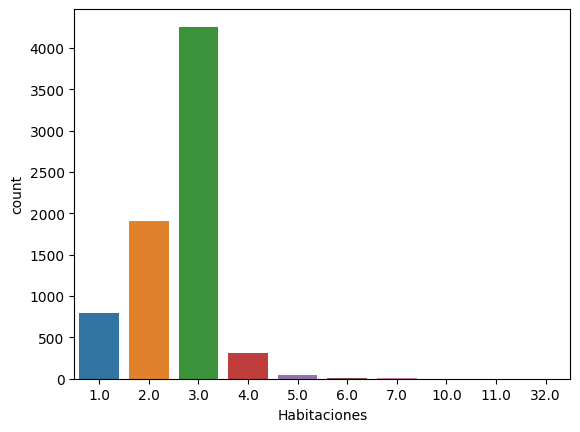

In [30]:
sns.countplot(x="Habitaciones",data=bogota_aptos)

<Axes: xlabel='Baños', ylabel='count'>

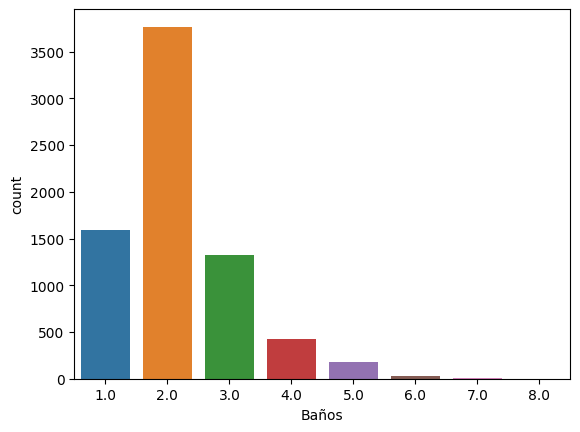

In [31]:
sns.countplot(x="Baños",data=bogota_aptos)

In [32]:
# =
bogota_aptos["Baños"] = bogota_aptos["Baños"].replace(5.0,4.0)
bogota_aptos["Baños"]

<ipython-input-32-c4990e98d112>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bogota_aptos["Baños"] = bogota_aptos["Baños"].replace(5.0,4.0)


0       2.0
2       3.0
3       2.0
4       3.0
5       2.0
       ... 
9509    3.0
9511    4.0
9515    2.0
9516    2.0
9519    1.0
Name: Baños, Length: 7326, dtype: float64

In [33]:
bogota_aptos["Baños"] = bogota_aptos["Baños"].replace(6.0,4.0).replace(7.0,4.0).replace(8.0,4.0)

<ipython-input-33-0653d33b787b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bogota_aptos["Baños"] = bogota_aptos["Baños"].replace(6.0,4.0).replace(7.0,4.0).replace(8.0,4.0)


<Axes: xlabel='Baños', ylabel='count'>

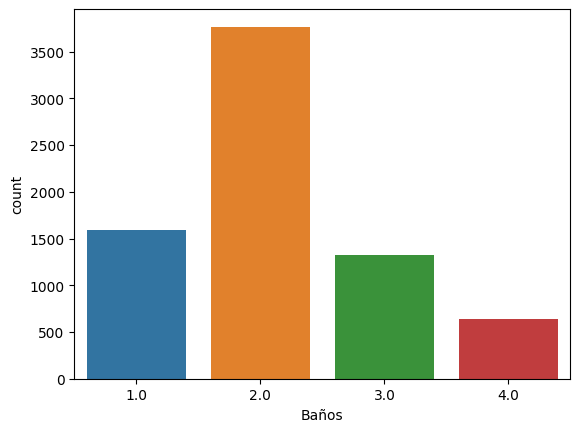

In [34]:
sns.countplot(x="Baños",data=bogota_aptos)
## los valores dentro de 4 representan los apartamentos que tienen 4 baños o mas

In [35]:
bogota_aptos2 = bogota_aptos.drop(["Tipo","Descripcion","Barrio","UPZ","tipo solo apartamento"],axis=1)
#,"Descripcion","Barrio","UPZ","tipo solo apartamento
bogota_aptos2




,Habitaciones,Baños,Área,Valor,Promedio de area de cada ambiente,Valor por ambiente,metro cuadrado
0,3.0,2.0,70.0,3.600000e+08,0.071429,1.200000e+08,1.944444e-07
2,3.0,3.0,144.0,1.120000e+09,0.041667,3.733333e+08,1.285714e-07
3,3.0,2.0,154.0,8.900000e+08,0.032468,2.966667e+08,1.730337e-07
4,2.0,3.0,128.0,9.700000e+08,0.039062,4.850000e+08,1.319588e-07
5,1.0,2.0,62.0,5.100000e+08,0.048387,5.100000e+08,1.215686e-07
...,...,...,...,...,...,...,...
9509,3.0,3.0,180.0,1.250000e+09,0.033333,4.166667e+08,1.440000e-07
9511,4.0,4.0,250.0,1.375000e+09,0.036000,3.437500e+08,1.818182e-07
9515,3.0,2.0,70.0,2.900000e+08,0.071429,9.666667e+07,2.413793e-07
9516,2.0,2.0,100.0,6.700000e+08,0.040000,3.350000e+08,1.492537e-07


In [36]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)
# para hacer el undersampling aplicamos imblearn


In [37]:
X = bogota_aptos2.drop("Baños",axis=1)
Y = bogota_aptos2.Baños

In [38]:
Y.shape

(7326,)

In [39]:
X_over,Y_over = undersample.fit_resample(X,Y)
#fit_resamples() calcula un conjunto de métricas de rendimiento en uno o más remuestreos, entrena al modelo
#Con undersample balanceamos todas las clases de los datos
X_over

,Habitaciones,Área,Valor,Promedio de area de cada ambiente,Valor por ambiente,metro cuadrado
0,1.0,54.0,4.340000e+08,0.037037,4.340000e+08,1.244240e-07
1,3.0,48.0,1.290000e+08,0.083333,4.300000e+07,3.720930e-07
2,1.0,31.0,2.300000e+08,0.064516,2.300000e+08,1.347826e-07
3,1.0,26.0,1.300000e+08,0.076923,1.300000e+08,2.000000e-07
4,2.0,53.0,2.550000e+08,0.056604,1.275000e+08,2.078431e-07
...,...,...,...,...,...,...
2559,4.0,346.0,2.990000e+09,0.026012,7.475000e+08,1.157191e-07
2560,3.0,149.0,9.900000e+08,0.046980,3.300000e+08,1.505051e-07
2561,4.0,366.0,3.950000e+09,0.021858,9.875000e+08,9.265823e-08
2562,3.0,390.0,3.200000e+09,0.017949,1.066667e+09,1.218750e-07


In [40]:
Y_over

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2559    4.0
2560    4.0
2561    4.0
2562    4.0
2563    4.0
Name: Baños, Length: 2564, dtype: float64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Habitaciones'),
  Text(1, 0, 'Área'),
  Text(2, 0, 'Valor'),
  Text(3, 0, 'Promedio de area de cada ambiente'),
  Text(4, 0, 'Valor por ambiente'),
  Text(5, 0, 'metro cuadrado')])

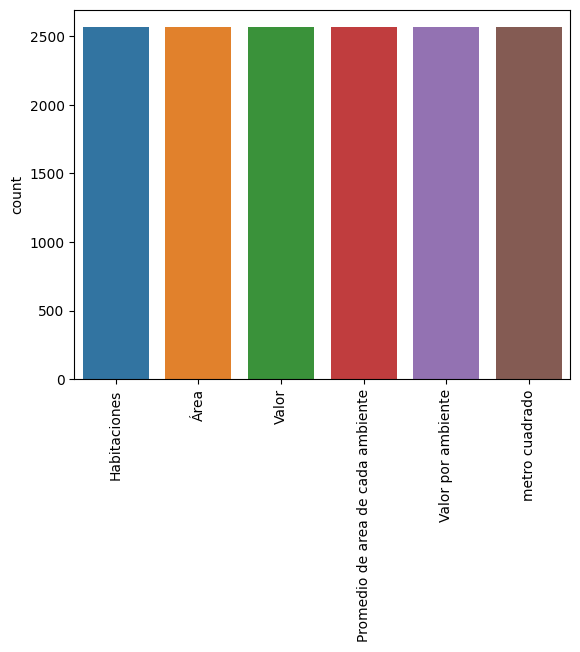

In [41]:
sns.countplot(X_over)
plt.xticks(rotation=90)


In [42]:
df_dea = X_over
df_dea["Habitaciones"] = Y_over

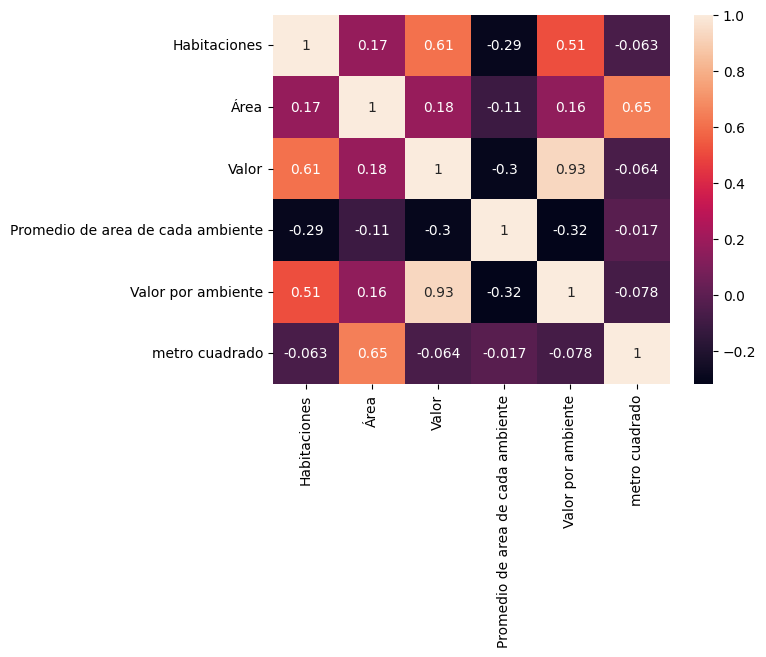

In [43]:
sns.heatmap(X_over.corr(),annot=True)
plt.show()

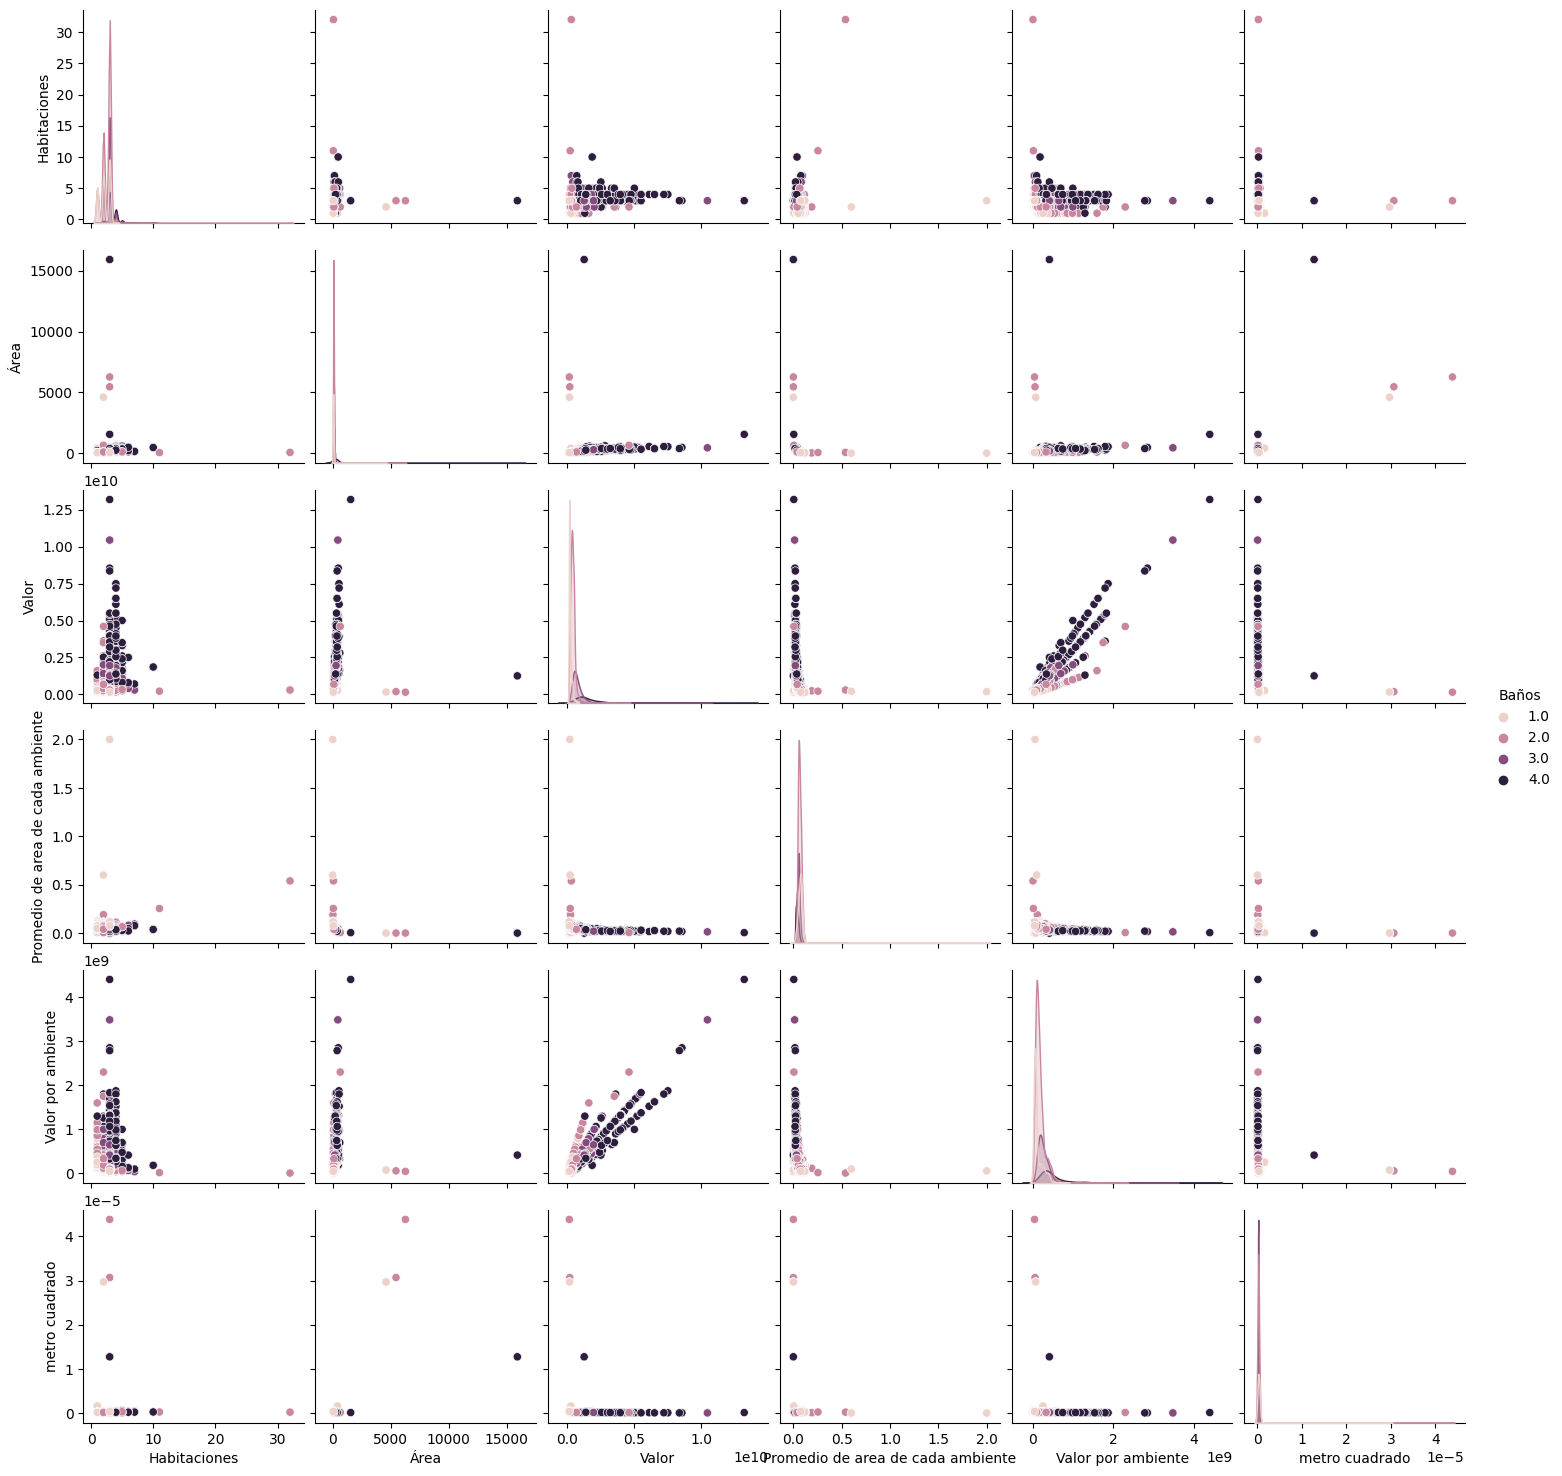

In [44]:
sns.pairplot(bogota_aptos2, hue="Baños")

In [45]:
from sklearn.model_selection import train_test_split


In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X_over, Y_over, random_state=42, shuffle=True, test_size=.2)

In [47]:
X_train

,Habitaciones,Área,Valor,Promedio de area de cada ambiente,Valor por ambiente,metro cuadrado
1135,2.0,72.0,490000000.0,0.055556,2.450000e+08,1.469388e-07
1299,3.0,93.0,790000000.0,0.053763,3.950000e+08,1.177215e-07
2157,4.0,180.0,720000000.0,0.038889,2.400000e+08,2.500000e-07
1350,3.0,128.0,890000000.0,0.046875,2.966667e+08,1.438202e-07
2279,4.0,130.0,830000000.0,0.053846,2.766667e+08,1.566265e-07
...,...,...,...,...,...,...
1638,3.0,120.0,950000000.0,0.050000,3.166667e+08,1.263158e-07
1095,2.0,47.0,257000000.0,0.085106,1.285000e+08,1.828794e-07
1130,2.0,84.0,390000000.0,0.059524,1.300000e+08,2.153846e-07
1294,3.0,109.0,550000000.0,0.055046,1.833333e+08,1.981818e-07


In [48]:
X_train = X_train.drop("Class", axis=1)


KeyError: ignored

In [49]:
X_train

,Habitaciones,Área,Valor,Promedio de area de cada ambiente,Valor por ambiente,metro cuadrado
1135,2.0,72.0,490000000.0,0.055556,2.450000e+08,1.469388e-07
1299,3.0,93.0,790000000.0,0.053763,3.950000e+08,1.177215e-07
2157,4.0,180.0,720000000.0,0.038889,2.400000e+08,2.500000e-07
1350,3.0,128.0,890000000.0,0.046875,2.966667e+08,1.438202e-07
2279,4.0,130.0,830000000.0,0.053846,2.766667e+08,1.566265e-07
...,...,...,...,...,...,...
1638,3.0,120.0,950000000.0,0.050000,3.166667e+08,1.263158e-07
1095,2.0,47.0,257000000.0,0.085106,1.285000e+08,1.828794e-07
1130,2.0,84.0,390000000.0,0.059524,1.300000e+08,2.153846e-07
1294,3.0,109.0,550000000.0,0.055046,1.833333e+08,1.981818e-07


In [50]:
X_train

,Habitaciones,Área,Valor,Promedio de area de cada ambiente,Valor por ambiente,metro cuadrado
1135,2.0,72.0,490000000.0,0.055556,2.450000e+08,1.469388e-07
1299,3.0,93.0,790000000.0,0.053763,3.950000e+08,1.177215e-07
2157,4.0,180.0,720000000.0,0.038889,2.400000e+08,2.500000e-07
1350,3.0,128.0,890000000.0,0.046875,2.966667e+08,1.438202e-07
2279,4.0,130.0,830000000.0,0.053846,2.766667e+08,1.566265e-07
...,...,...,...,...,...,...
1638,3.0,120.0,950000000.0,0.050000,3.166667e+08,1.263158e-07
1095,2.0,47.0,257000000.0,0.085106,1.285000e+08,1.828794e-07
1130,2.0,84.0,390000000.0,0.059524,1.300000e+08,2.153846e-07
1294,3.0,109.0,550000000.0,0.055046,1.833333e+08,1.981818e-07


In [51]:
X_test = X_test.drop("Class", axis=1)
X_test

KeyError: ignored

In [52]:
Y_test

1307    3.0
1990    4.0
1521    3.0
478     1.0
1792    3.0
       ... 
1891    3.0
942     2.0
2471    4.0
2002    4.0
361     1.0
Name: Baños, Length: 513, dtype: float64

In [53]:
Y_train


1135    2.0
1299    3.0
2157    4.0
1350    3.0
2279    4.0
       ... 
1638    3.0
1095    2.0
1130    2.0
1294    3.0
860     2.0
Name: Baños, Length: 2051, dtype: float64

In [54]:
## el solver es el algoritmo usado en el problema de clasificacion, el sag y saga son buenos para Databases grandes
## newton-cg, sag, saga y lbfgs ayudan para problemas multiclase
def LogReg_model(C_,Solver_,multiclass_):
    logistic_regression_model = LogisticRegression(random_state=42,solver=Solver_,multi_class=multiclass_,n_jobs=-1,C=C_)
    return logistic_regression_model

In [55]:
model = LogReg_model(1,"newton-cg","ovr")
model.fit(X_train,Y_train)
predictions = model.predict(X_test)
print(confusion_matrix(Y_test,predictions))
print(accuracy_score(Y_test,predictions))



[[128   0   2   0]
 [ 11   1 106   5]
 [  0   0  86  35]
 [  0   0   6 133]]
0.6783625730994152


In [56]:
confusion_matrix

<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

In [57]:
scores

NameError: ignored

In [58]:
acuracy_test

NameError: ignored

In [59]:
MODELOSMULTILINEAR = ["ovr","multinomial"]
SOLVER = ["liblinear","newton-cg","lbfgs","sag","saga"]
scores = []
params = []
for i in MODELOSMULTILINEAR:
  for j in SOLVER:
    try:
      model = LogReg_model(1,j,i)
      model.fit(X_train, Y_train)
      predictions = model.predict(X_test)
      accuracy = accuracy_score(Y_test,predictions)
      scores.append(accuracy)
      params.append(i + "-" + j)
    except:
          None
# el try

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The

In [60]:
scores

[0.39766081871345027,
 0.6783625730994152,
 0.39766081871345027,
 0.39766081871345027,
 0.39766081871345027,
 0.5029239766081871,
 0.4249512670565302,
 0.4249512670565302,
 0.39766081871345027]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'ovr-liblinear'),
  Text(1, 0, 'ovr-newton-cg'),
  Text(2, 0, 'ovr-lbfgs'),
  Text(3, 0, 'ovr-sag'),
  Text(4, 0, 'ovr-saga'),
  Text(5, 0, 'multinomial-newton-cg'),
  Text(6, 0, 'multinomial-lbfgs'),
  Text(7, 0, 'multinomial-sag'),
  Text(8, 0, 'multinomial-saga')])

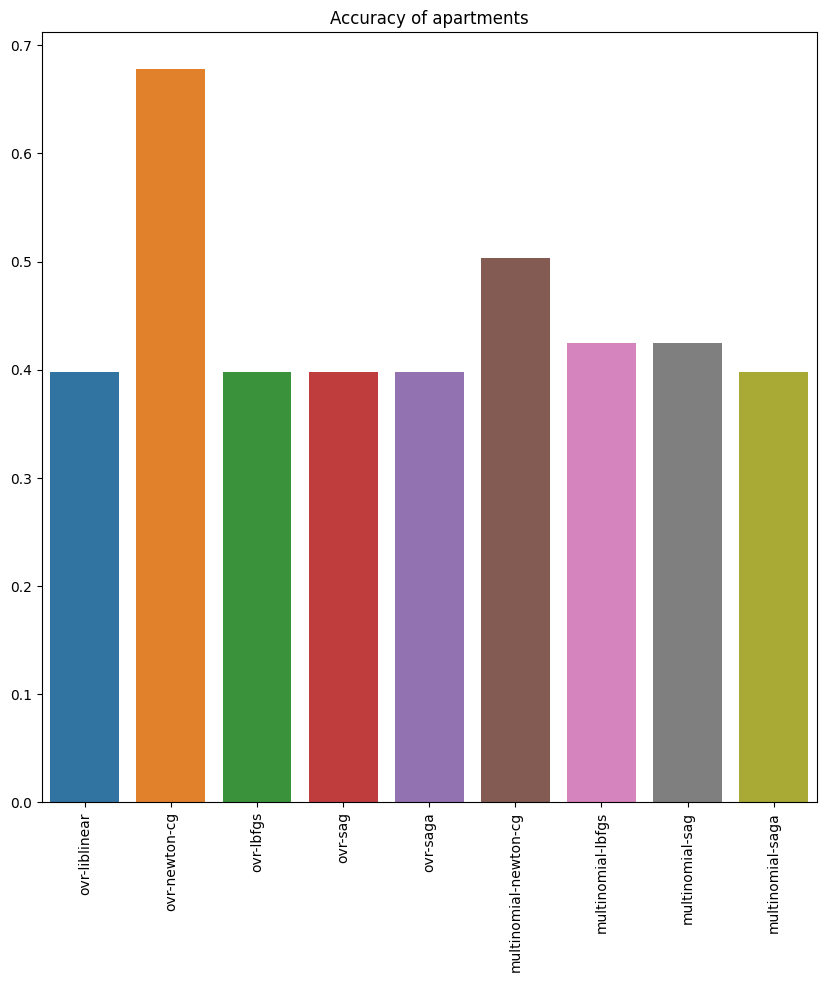

In [61]:
fig = plt.figure(figsize=(10,10))
sns.barplot(x=params, y=scores).set_title("Accuracy of apartments")
plt.xticks(rotation=90)

In [62]:
## La regresion logistica genero bajos niveles de precision ya que no habian mucha correlacion entre las diferentes variables

In [63]:
try:
  a = kajdlkja
except:
  print("error")


error


<function matplotlib.pyplot.show(close=None, block=None)>

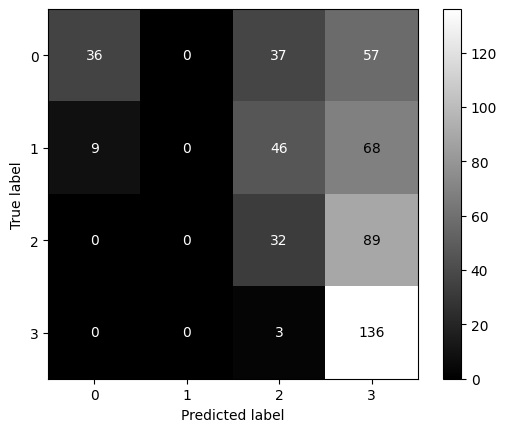

In [64]:
cm = confusion_matrix(Y_test,predictions, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap="gray")
plt.show

In [65]:
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [66]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=7,random_state=00000)
forest

RandomForestClassifier(n_estimators=7, random_state=0)

In [67]:
tree_bogota = forest.fit(X_train,Y_train)

In [68]:
Y_train_predict_tree = forest.predict(X_train)
Y_test_predict_tree = forest.predict(X_test)

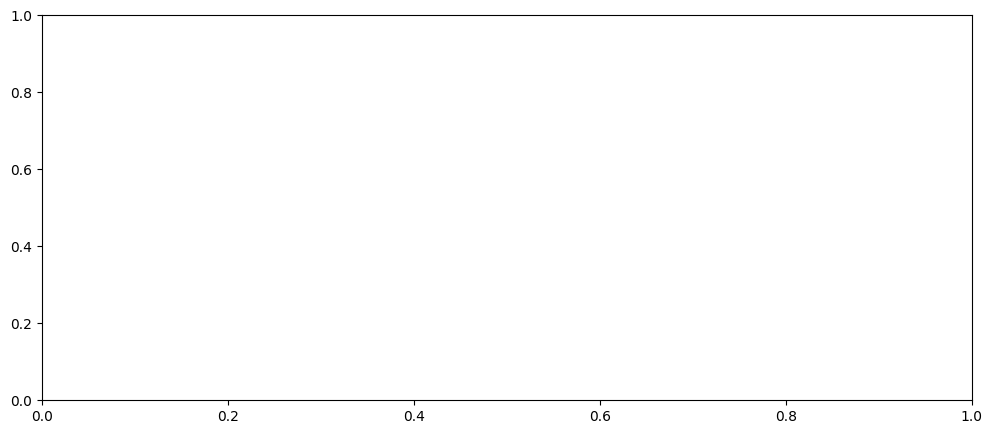

In [69]:
from sklearn.tree import plot_tree
fig, ax =plt.subplots(figsize=(12,5))

In [70]:
features_scores = pd.Series(forest.feature_importances_, index=X_train.columns).sort_values(ascending=False)
features_scores

Habitaciones                         0.477695
Área                                 0.220685
Valor                                0.143047
Valor por ambiente                   0.081832
Promedio de area de cada ambiente    0.076740
metro cuadrado                       0.000000
dtype: float64

In [71]:
sns.barplot(features_scores, palette="bright",saturation="bright",2.0,edgecolor="black",linewidth = 2)

SyntaxError: ignored

<Axes: >

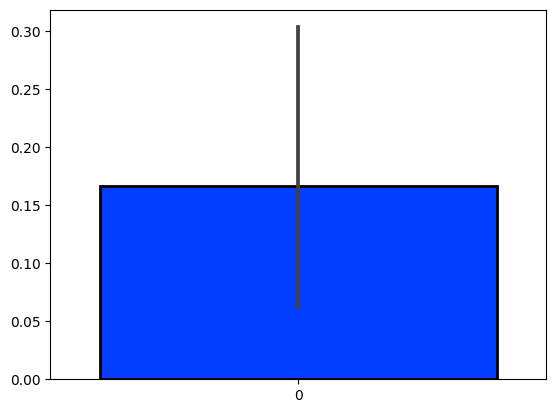

In [72]:
sns.barplot( features_scores, palette = "bright", saturation = 2.0, edgecolor = "black", linewidth = 2)

In [104]:
#Arbol de decision
from sklearn.tree import DecisionTreeClassifier
#Creacion del modelo
tree = DecisionTreeClassifier(max_depth=1, random_state=00000)

In [105]:
tree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=1, random_state=0)

In [106]:
importances = tree.feature_importances_
columns = X.columns
data = pd.DataFrame([importances], columns=columns)

In [107]:
Y_train_pred_tree =tree.predict(X_train)
Y_test_pred_tree =tree.predict(X_test)


In [108]:
Y_test_pred_tree

array([3., 3., 3., 2., 3., 3., 3., 2., 2., 3., 2., 3., 2., 3., 2., 2., 2.,
       3., 2., 3., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 2., 3.,
       3., 2., 2., 3., 2., 2., 3., 3., 2., 3., 2., 3., 3., 2., 2., 2., 2.,
       3., 2., 3., 2., 2., 3., 3., 3., 3., 2., 2., 3., 2., 3., 2., 3., 3.,
       2., 2., 3., 3., 2., 2., 2., 2., 3., 3., 3., 2., 3., 3., 3., 3., 3.,
       2., 2., 2., 2., 3., 3., 2., 3., 3., 2., 3., 3., 2., 3., 3., 3., 3.,
       3., 3., 3., 2., 3., 2., 2., 3., 3., 3., 2., 3., 3., 2., 3., 2., 2.,
       2., 2., 2., 3., 3., 3., 2., 2., 2., 2., 3., 2., 2., 2., 3., 2., 2.,
       2., 3., 2., 2., 2., 3., 3., 3., 2., 2., 3., 3., 2., 3., 2., 3., 3.,
       2., 3., 3., 2., 3., 3., 3., 3., 2., 2., 2., 2., 3., 2., 2., 3., 3.,
       2., 3., 3., 2., 3., 2., 2., 3., 3., 3., 3., 2., 2., 2., 3., 3., 3.,
       3., 2., 3., 2., 3., 3., 3., 3., 2., 2., 2., 3., 3., 2., 3., 3., 3.,
       2., 2., 3., 3., 3., 3., 2., 3., 3., 3., 2., 2., 3., 2., 2., 3., 2.,
       3., 3., 2., 2., 2.

In [109]:
Y_train_pred_tree

array([2., 3., 3., ..., 2., 3., 2.])

In [110]:
train_acuracy_tree = accuracy_score(Y_train,Y_train_pred_tree)
test_acuracy_tree = accuracy_score(Y_test,Y_test_pred_tree)
print("El acuracy en train es ",train_acuracy_tree)
print("El acuracy en test es ",test_acuracy_tree)

El acuracy en train es  0.5060945880058508
El acuracy en test es  0.4756335282651072


In [111]:
train_acuracy_tree

0.5060945880058508